## JAI SAI RAM ##

### Import Libraries

In [295]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression,Ridge,Lasso

<h2 align="center" style="color:blue">Data Loading</h2>

In [296]:
df=pd.read_excel("premiums_young_with_gr.xlsx")
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4


In [297]:
df.shape

(20096, 14)

#### Make column name uniform

In [298]:
df.columns=df.columns.str.replace(" ","-").str.lower()

In [299]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number-of-dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical-history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

In [300]:
df.columns=df.columns.str.replace("-","_").str.lower()

In [301]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

In [302]:
df.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4


<h2 align="center" style="color:blue"> Exploratory Data Analysis & Data Cleaning</h2>

In [303]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [304]:
df.smoking_status.unique()

array(['Regular', 'No Smoking', 'Occasional', 'Smoking=0',
       'Does Not Smoke', 'Not Smoking', nan], dtype=object)

In [305]:
df.smoking_status.mode()

0    No Smoking
Name: smoking_status, dtype: object

In [306]:
df.income_level.unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L', nan], dtype=object)

#### As smoking_status colud be high impacting feature and counts are only 7  compare to total count so deleting those na records instaed replacing 

In [307]:
df.dropna(inplace=True)

In [308]:
df.shape

(20090, 14)

#### Handel Duplicate Values

In [309]:
df.drop_duplicates(inplace=True)

In [310]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [311]:
df.duplicated().sum()

0

In [312]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


#### Handel number_of_dependants 

In [313]:
df.number_of_dependants.unique()

array([ 0,  2,  1,  3, -3, -1], dtype=int64)

There are -ve values for the column which seems error and can be replced with +ve values

In [314]:
df['number_of_dependants']=df['number_of_dependants'].abs()

In [315]:
df.number_of_dependants.unique()

array([0, 2, 1, 3], dtype=int64)

## 1.Numeric Columns

### Univariat Analysis Numeric Columns

#### Box Plot  For Numeric Columns

In [316]:
print(df.dtypes)

age                       int64
gender                   object
region                   object
marital_status           object
number_of_dependants      int64
bmi_category             object
smoking_status           object
employment_status        object
income_level             object
income_lakhs              int64
medical_history          object
insurance_plan           object
annual_premium_amount     int64
genetical_risk            int64
dtype: object


In [317]:
numeric_coluns=df.select_dtypes(include=['int64']).columns
numeric_coluns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

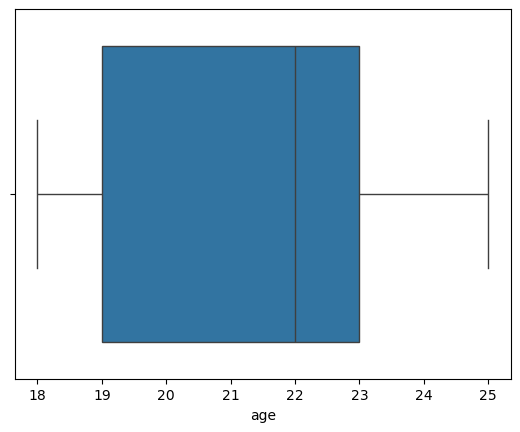

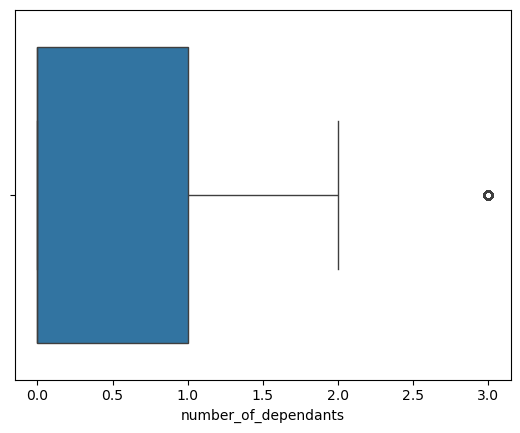

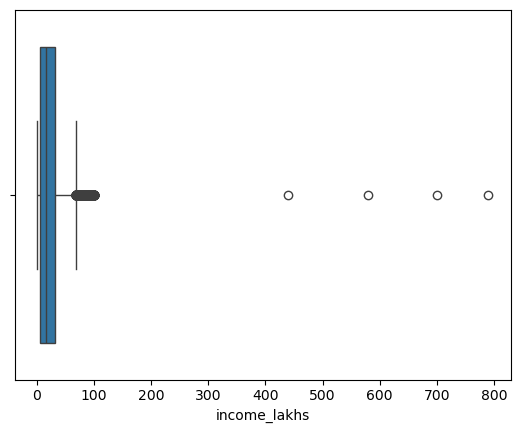

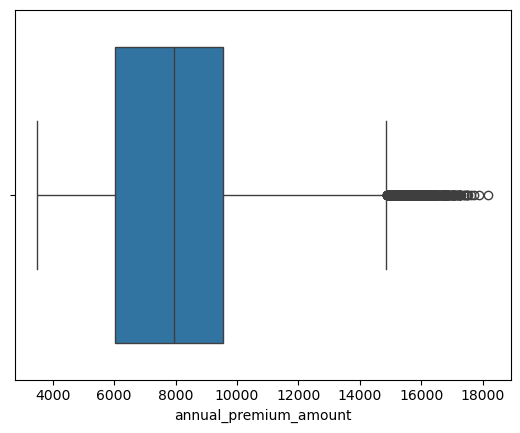

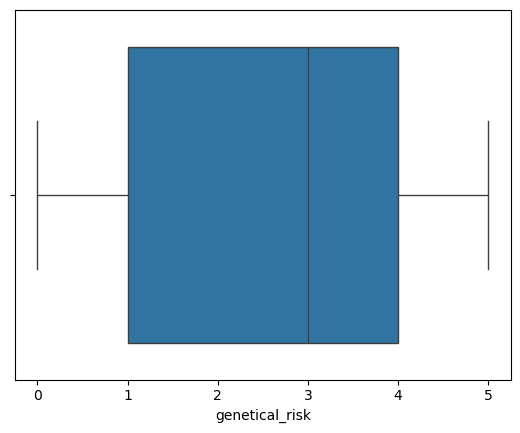

In [318]:
for col in numeric_coluns:
    sns.boxplot(x=df[col])
    plt.show()

#### Outlier Tratment to Age Column

In [319]:
df[df['age']>100]['age'].unique()

array([], dtype=int64)

In [320]:
df_OT=df[df['age']<=100]
df_OT.age.describe()

count    20090.000000
mean        21.494375
std          2.294052
min         18.000000
25%         19.000000
50%         22.000000
75%         23.000000
max         25.000000
Name: age, dtype: float64

In [321]:
df_OT[df_OT['age']>100]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk


In [322]:
df_OT.shape

(20090, 14)

In [323]:
df_OT.age.describe()

count    20090.000000
mean        21.494375
std          2.294052
min         18.000000
25%         19.000000
50%         22.000000
75%         23.000000
max         25.000000
Name: age, dtype: float64

#### Outlier Treatment Income Column

In [324]:
def get_iqr_bounds(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return lower_bound,upper_bound

lower,upper=get_iqr_bounds(df_OT['income_lakhs'])
lower,upper

(-31.5, 68.5)

In [325]:
df_OT[df['income_lakhs']>upper].shape

(1295, 14)

There are many legitimate records that we will get rid of if we use IQR bounds method. Hence after discussion with business we decided to use a simple quantile bound 

In [326]:
quantile_threshold=df_OT['income_lakhs'].quantile(0.999)
quantile_threshold

100.0

In [327]:
df_OT[df_OT['income_lakhs']>quantile_threshold].shape

(4, 14)

In [328]:
df_OT.shape
df_OT[df_OT['income_lakhs']>quantile_threshold]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
1677,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,440,No Disease,Silver,10636,3
4311,20,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40L,580,Thyroid,Silver,12888,5
4661,21,Female,Southwest,Unmarried,0,Obesity,No Smoking,Freelancer,> 40L,700,No Disease,Bronze,7424,3
6251,21,Female,Southeast,Unmarried,0,Normal,Occasional,Salaried,> 40L,790,No Disease,Silver,7586,0


In [329]:
df_OT1=df_OT[df_OT['income_lakhs']<=quantile_threshold].copy()
df_OT1.shape

(20086, 14)

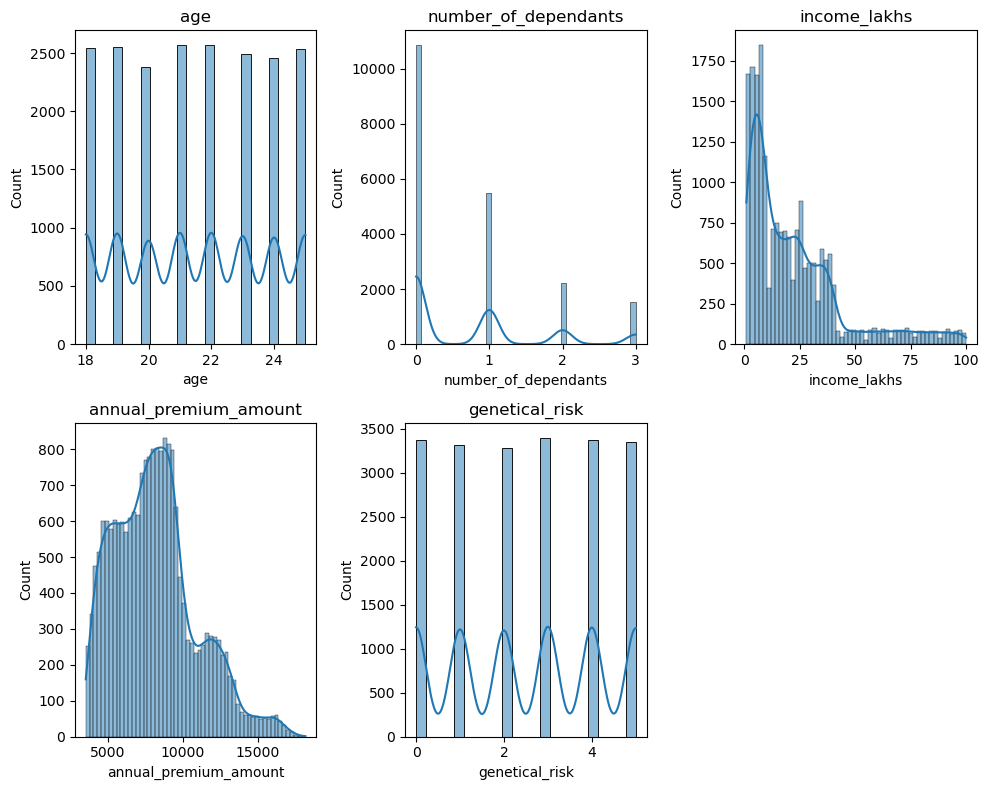

In [330]:
figs,axs=plt.subplots(nrows=2,ncols=3,figsize=(10,8))
for i,columns in enumerate(numeric_coluns):
    ax=axs[i//3,i%3]  # Determines the position of the subplot in the grid
    sns.histplot(df_OT1[columns],kde=True,ax=ax)
    ax.set_title(columns)

    # If the last subplot axis is unused, you can turn it off
if len(numeric_coluns) % 3 != 0:
    for j in range(len(numeric_coluns), 6):  # This will disable any unused subplots
        axs.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

In [331]:
df_OT1.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3


### Bivariant Analysis :Numeric Columns

In [332]:
numeric_coluns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

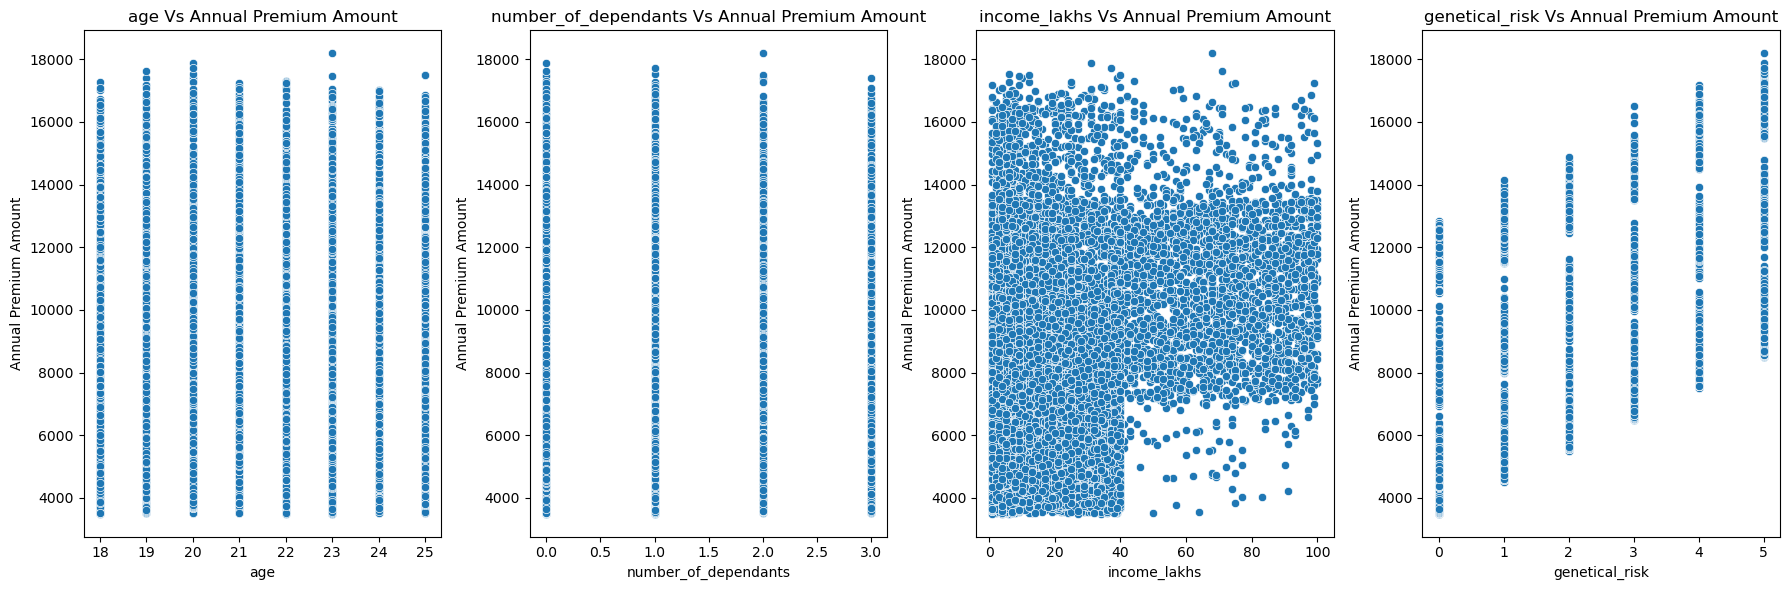

In [333]:
numeric_features=['age', 'number_of_dependants', 'income_lakhs','genetical_risk']

fig,axes=plt.subplots(1,len(numeric_features),figsize=(18,6))

for ax,columns in zip(axes,numeric_features):
    sns.scatterplot(x=df_OT1[columns],y=df_OT1['annual_premium_amount'],ax=ax)
    ax.set_title(f'{columns} Vs Annual Premium Amount' )
    ax.set_xlabel(columns)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()
plt.show() 


## 2.Categorical Columns

In [334]:
categorical_columns=df_OT1.select_dtypes(exclude=['number']).columns
categorical_columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [335]:
for col in categorical_columns:
    print(col,':',df_OT1[col].unique())

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [336]:
df_OT1.smoking_status.replace(
    {
        'Smoking=0':'No Smoking',
        'Does Not Smoke':'No Smoking',
         'Not Smoking':'No Smoking',
    },inplace=True
)

In [337]:
df_OT1.smoking_status.unique()

array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

`

### Univariate Analysis

In [338]:
df_OT1.shape

(20086, 14)

In [339]:
df_OT1.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3


In [340]:
pct_count=df_OT1['gender'].value_counts(normalize=True)*100
pct_count.index,pct_count.value_counts,pct_count.values

(Index(['Male', 'Female'], dtype='object'),
 <bound method IndexOpsMixin.value_counts of Male      55.038335
 Female    44.961665
 Name: gender, dtype: float64>,
 array([55.03833516, 44.96166484]))

In [341]:
sns.barplot(x=pct_count.index,y=pct_count.values,ax=ax)

<AxesSubplot:title={'center':'genetical_risk Vs Annual Premium Amount'}, xlabel='genetical_risk', ylabel='Annual Premium Amount'>

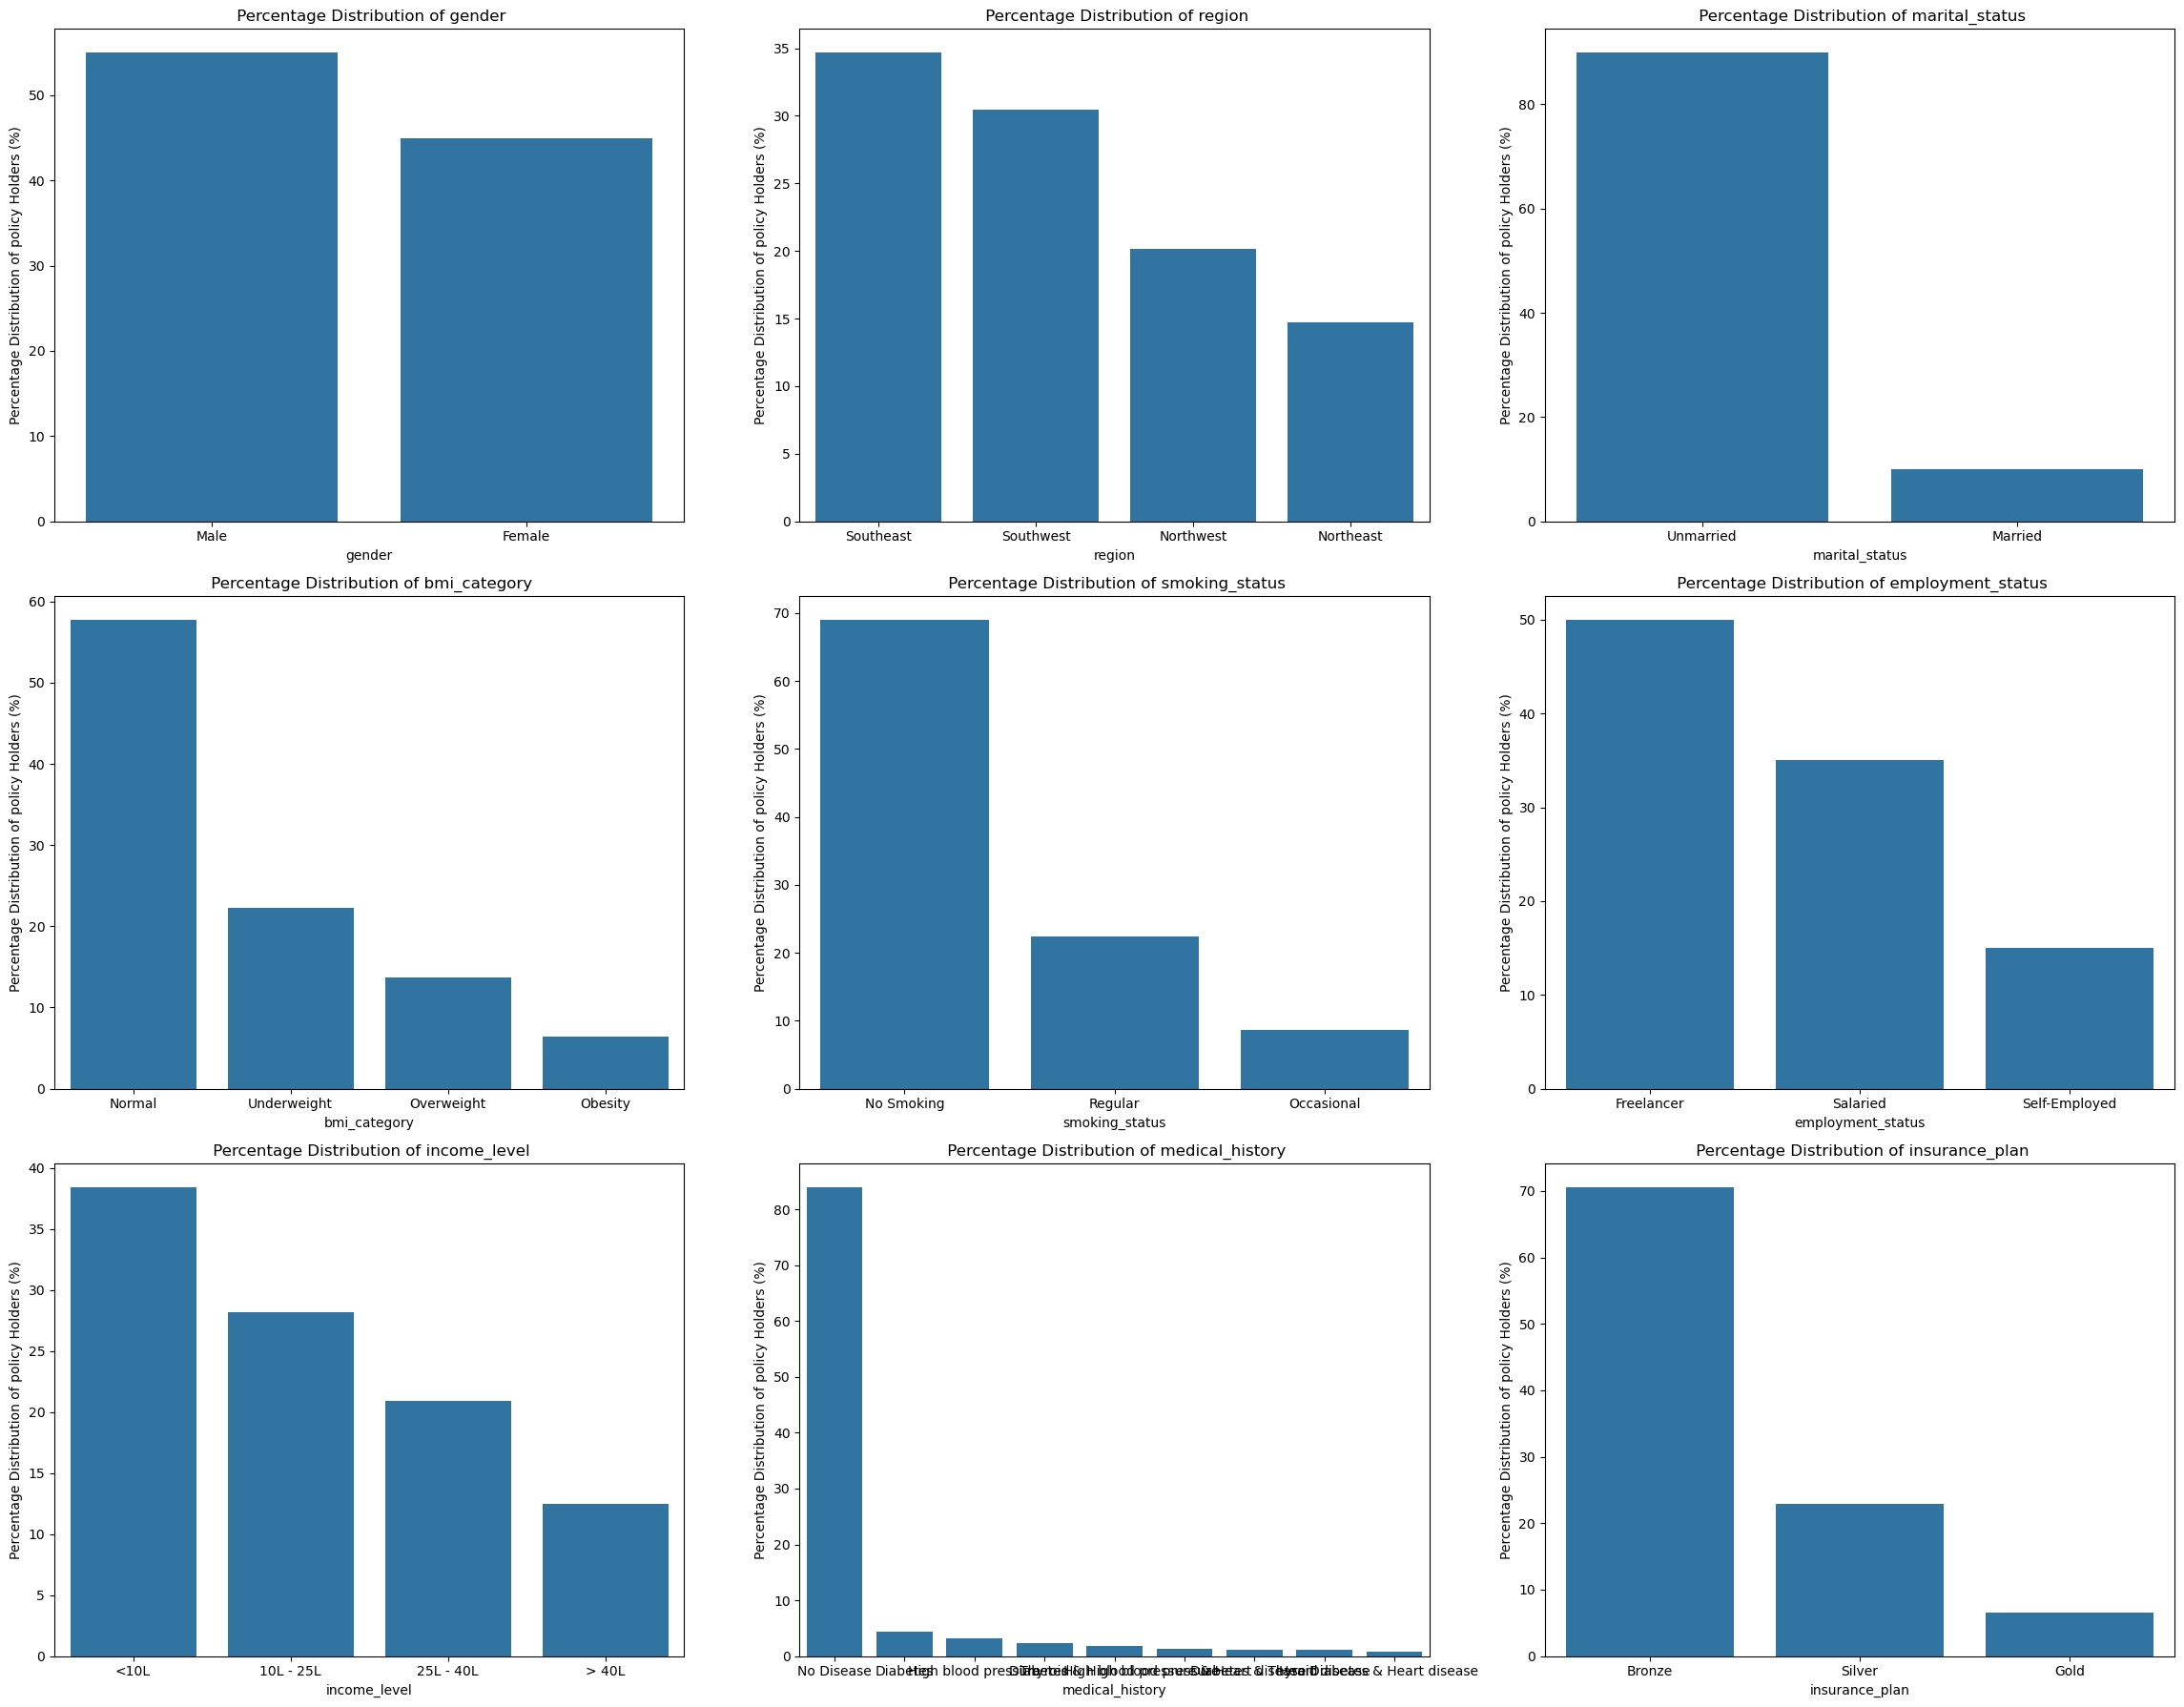

In [342]:
fig,axes=plt.subplots(3,3,figsize=(23,18))
axes=axes.flatten()

for ax,columns in zip(axes,categorical_columns):
    # Calculate the percentage distribution of each category
    categorical_counts=df_OT1[columns].value_counts(normalize=True)*100 # normalize=True gives the relative frequencies
   # Plotting the distribution using barplot
    sns.barplot(x=categorical_counts.index,y=categorical_counts.values,ax=ax)
    ax.set_title(f' Percentage Distribution of {columns}')
    ax.set_ylabel('Percentage Distribution of policy Holders (%)')
    ax.set_xlabel(columns) # Set xlabel to the column name for clarity
    
plt.tight_layout()  # Adjusts plot parameters for better fit in the figure window
plt.show()
   

### Bivariate Analysis

In [343]:
# Cross-tabulation of gender and smoking status
crosstab=pd.crosstab(df_OT1['income_level'],df_OT1['insurance_plan'])
print(crosstab)

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         4508   326     828
25L - 40L         3382   209     608
<10L              6172   404    1145
> 40L              115   366    2023


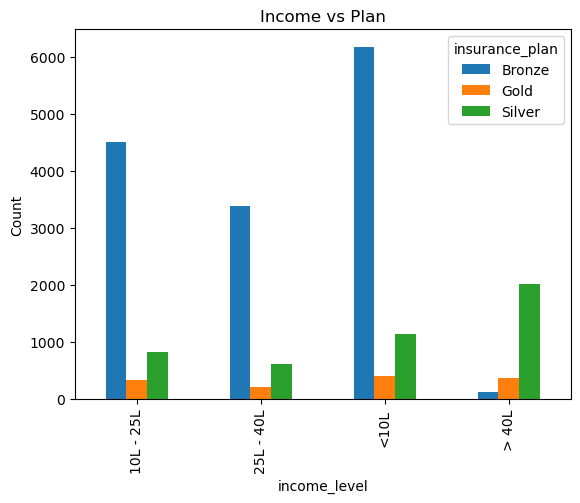

In [344]:
crosstab.plot(kind='bar')
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

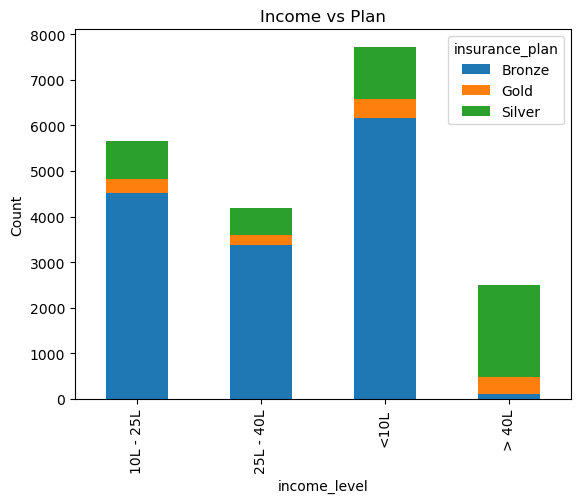

In [345]:
crosstab.plot(kind='bar',stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

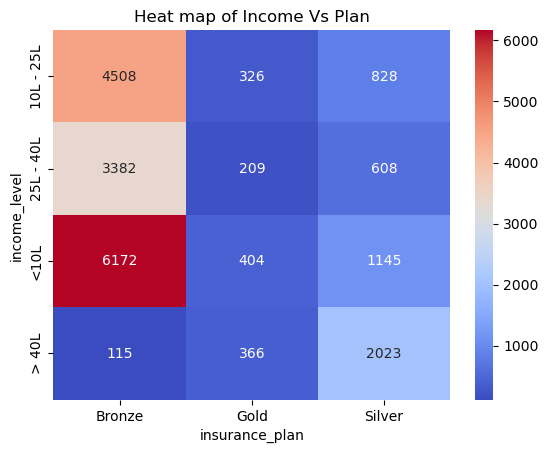

In [346]:
sns.heatmap(crosstab,annot=True,cmap='coolwarm',fmt='d')
plt.title('Heat map of Income Vs Plan')
plt.show()

<h2 align="center" style="color:blue"> Feature Enginnering </h2>

In [347]:
df_OT1.shape

(20086, 14)

In [348]:
df_OT1.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3


In [349]:
df_OT1.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

### Calculate Risk Score

In [350]:
#Business provided risk score numbers for each condition to evalue risk
risk_scores={
     "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

df_OT1[['disease1','disease2']]=df_OT1['medical_history'].str.split(" & ",expand=True).apply(lambda x: x.str.lower())
df_OT1['disease1'].fillna('none',inplace=True)
df_OT1['disease2'].fillna('none',inplace=True)
df_OT1['total_risk_score']=0

for disease in ['disease1','disease2']:
    df_OT1['total_risk_score'] += df_OT1[disease].map(risk_scores)

# Normalize the risk score to a range of 0 to 1
max_score=df_OT1['total_risk_score'].max()
min_score=df_OT1['total_risk_score'].min()

df_OT1['normalised_risk_score']=(df_OT1['total_risk_score']-min_score)/(max_score-min_score)


In [351]:
df_OT1.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalised_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0,0.000000


### Encode Text Columns

In [352]:
df_OT1.select_dtypes(exclude=['number']).columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan', 'disease1', 'disease2'],
      dtype='object')

In [353]:
df_OT1['insurance_plan'].unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [354]:
df_OT2=df_OT1.copy()

In [355]:
df_OT2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalised_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0,0.000000


In [356]:
df_OT2['insurance_plan']=df_OT2['insurance_plan'].map({'Bronze':1,'Silver':2,'Gold':3})

In [357]:
df_OT2.income_level.unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [358]:
df_OT2['income_level']=df_OT2['income_level'].map({'<10L':1,'10L - 25L':2,'25L - 40L':3,'> 40L':4})

In [359]:
cols=['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status']

In [360]:
df_encode=pd.get_dummies(df_OT2,columns=cols,drop_first=True,dtype=int)
df_encode.head(3)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,High blood pressure,2,13365,4,high blood pressure,none,...,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,No Disease,2,11050,3,no disease,none,...,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,No Disease,2,11857,4,no disease,none,...,1,0,1,0,0,0,0,1,1,0


In [361]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20086 entries, 0 to 20095
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              20086 non-null  int64  
 1   number_of_dependants             20086 non-null  int64  
 2   income_level                     20086 non-null  int64  
 3   income_lakhs                     20086 non-null  int64  
 4   medical_history                  20086 non-null  object 
 5   insurance_plan                   20086 non-null  int64  
 6   annual_premium_amount            20086 non-null  int64  
 7   genetical_risk                   20086 non-null  int64  
 8   disease1                         20086 non-null  object 
 9   disease2                         20086 non-null  object 
 10  total_risk_score                 20086 non-null  int64  
 11  normalised_risk_score            20086 non-null  float64
 12  gender_Male       

### Feature Selection

In [362]:
df_encode1=df_encode.drop(['medical_history','disease1', 'disease2', 'total_risk_score'], axis=1)
df_encode1.head(2)


,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0


In [363]:
df_encode1.shape

(20086, 20)

### Calculate VIF for Multicolinearity

In [364]:
df_encode1.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'genetical_risk',
       'normalised_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

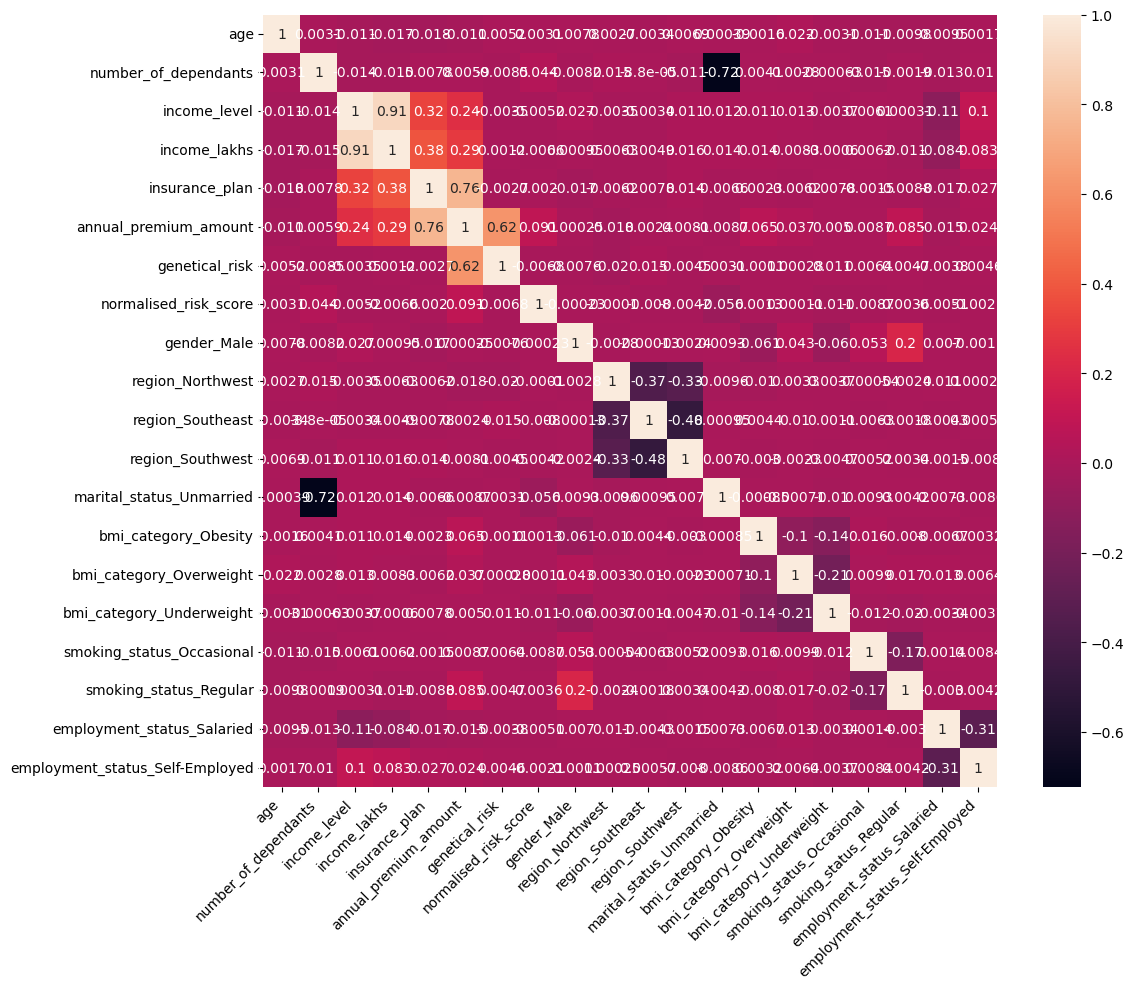

In [365]:
cm=df_encode1.corr()

plt.figure(figsize=(12,10))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [366]:
X=df_encode1.drop('annual_premium_amount',axis='columns')
y=df_encode1['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale=['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan','genetical_risk']
scaler = MinMaxScaler()

X[cols_to_scale]=scaler.fit_transform(X[cols_to_scale])
X.describe()


,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.357994,0.216064,0.179578,0.500777,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.347481,0.219516,0.300051,0.342037,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,0.800000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [367]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [368]:
calculate_vif(X)

,Column,VIF
0,age,3.154599
1,number_of_dependants,1.930428
2,income_level,11.928708
3,income_lakhs,11.876413
4,insurance_plan,1.592966
5,genetical_risk,2.981159
6,normalised_risk_score,1.154501
7,gender_Male,2.311831
8,region_Northwest,2.154355
9,region_Southeast,2.990493


In [369]:
calculate_vif(X.drop('income_level', axis="columns"))

,Column,VIF
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,normalised_risk_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


In [370]:
# we will drop income_lakhs due to high VIF value (Generally >10)
X_reduced = X.drop('income_level', axis="columns")

In [371]:
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,0.6,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,0.8,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,0.4,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,0.2,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


<h2 align="center" style="color:blue"> Model Traininmg </h2>

In [372]:
X_reduced.shape

(20086, 18)

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=10)

# shape of the X_train, X_test, y_train, y_test features
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (14060, 18)
x test:  (6026, 18)
y train:  (14060,)
y test:  (6026,)


### Linear Regression Model

In [374]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
test_score = model_lr.score(X_test, y_test)
train_score = model_lr.score(X_train, y_train)
train_score, test_score

(0.988297900194864, 0.9887263253056615)

In [375]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE:  85732.34377930447 RMSE:  292.80086027760314


In [376]:
X_test.shape

(6026, 18)

In [377]:
np.set_printoptions(suppress=True, precision=6)
model_lr.coef_

array([  -7.229032,   19.536182,   -1.264528, 7001.125261, 4996.988728,
       1109.148365,    8.177988,    1.677353,   -3.275327,    6.317095,
         16.068972,  812.844929,  400.375598,  107.529819,  205.069661,
        610.98328 ,    0.038784,   -5.242018])

In [97]:
feature_importance=model_lr.coef_
X_train.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'genetical_risk', 'normalised_risk_score', 'gender_Male',
       'region_Northwest', 'region_Southeast', 'region_Southwest',
       'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

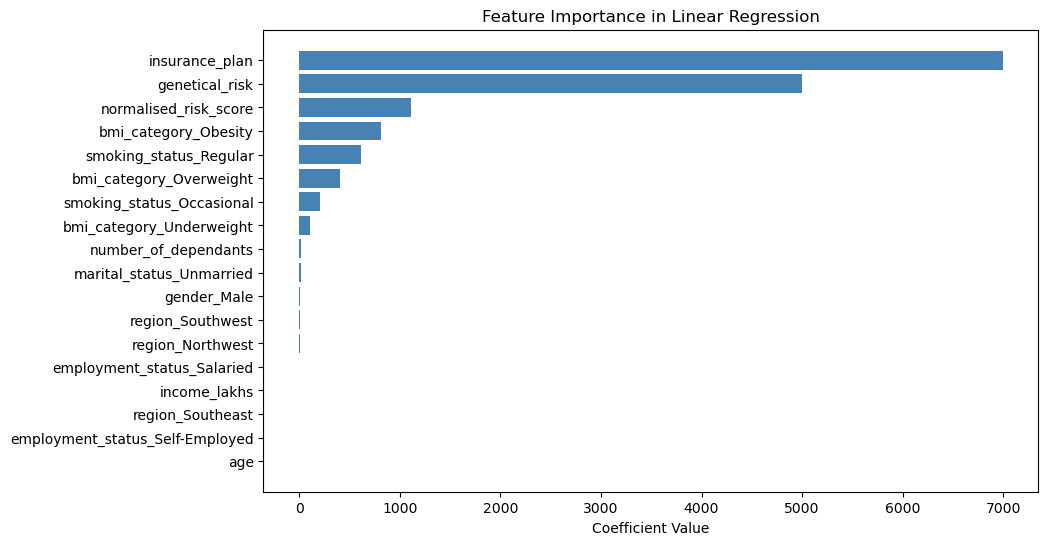

In [378]:
feature_importance=model_lr.coef_

# Create a DataFrame for easier handling
coef_df=pd.DataFrame(feature_importance,index=X_train.columns,columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df=coef_df.sort_values(by='Coefficients',ascending=True)

#Plotting
plt.figure(figsize=(10,6))
plt.barh(coef_df.index,coef_df['Coefficients'],color='Steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

### XGBoost

In [379]:
from xgboost import XGBRegressor
model_xgb=XGBRegressor(n_estimators=20, max_depth=3)
model_xgb.fit(X_train,y_train)
train_score=model_xgb.score(X_train,y_train)
test_score=model_xgb.score(X_test,y_test)
train_score,test_score                       

(0.9874536946245187, 0.9876989030995855)

In [380]:
model_xgb=XGBRegressor()
param_grid={
     'n_estimators': [20, 40, 50],
     'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],    
}
random_search=RandomizedSearchCV(model_xgb,param_grid,n_iter=10,cv=3,scoring='r2',random_state=42,n_jobs=-1)
random_search.fit(X_train,y_train)
random_search.best_score_

0.9879225990497197

In [381]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

### Distribution of Residuals

In [382]:
best_model=model_lr

In [383]:
y_pred=best_model.predict(X_test)

residuals=y_pred-y_test
residuals_pct=(residuals/y_test)* 100

results_df =pd.DataFrame(
    {
        'actual':y_test,
        'predicted':y_pred,
        'diff':residuals,
        'diff_pct':residuals_pct
    }
)

results_df.head()

,actual,predicted,diff,diff_pct
12774,6238,6121.456891,-116.543109,-1.868277
14758,9462,9601.797510,139.797510,1.477463
13205,5152,5611.056493,459.056493,8.910258
14278,6988,7423.486322,435.486322,6.231916
19351,4917,5112.056543,195.056543,3.966983


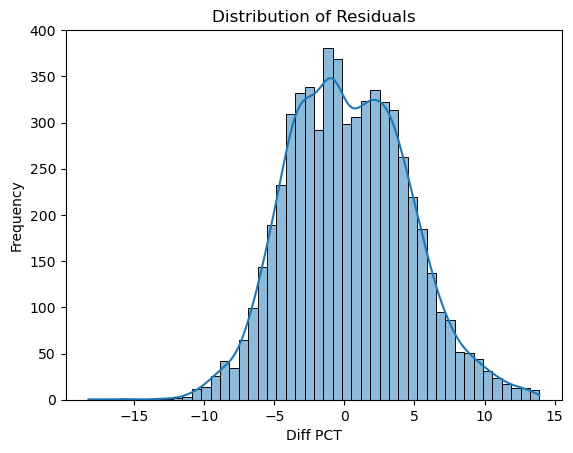

In [384]:
sns.histplot(results_df['diff_pct'],kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [385]:
X_test.shape

(6026, 18)

In [386]:
extreme_error_threshold=10 ## this threshold based agrred by business
extreme_results_df =results_df[np.abs(results_df['diff_pct'])>10]
extreme_results_df.head()

,actual,predicted,diff,diff_pct
12669,3985,4394.013230,409.013230,10.263820
2918,4517,5001.927338,484.927338,10.735606
17084,3562,3995.394401,433.394401,12.167165
7181,3630,4005.052340,375.052340,10.332020
12285,3532,3998.012625,466.012625,13.194015


In [387]:
extreme_results_df.shape

(129, 4)

In [388]:
extreme_errors_pct=extreme_results_df.shape[0]*100/X_test.shape[0]
extreme_errors_pct

2.140723531364089

We have now only 2% extreme errors 

In [389]:
extreme_results_df[abs(extreme_results_df.diff_pct)>50].sort_values("diff_pct",ascending=False)

,actual,predicted,diff,diff_pct


Ther are 0 records where we will overcharge or underchage by more than 50%

In [390]:
## Get actual data from X_test which cause the error
extreme_errors_df=X_test.loc[extreme_results_df.index]
extreme_errors_df.head(2)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
12669,0.857143,0.0,0.000000,0.0,0.0,0.0,1,0,1,0,1,0,1,0,0,0,1,0
2918,0.285714,0.0,0.151515,0.0,0.2,0.0,1,1,0,0,1,0,0,0,0,0,1,0


### Export The Model

In [392]:
from joblib import dump
dump(best_model,"artifacts/model_young.joblib")
scaler_with_cols = {
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(scaler_with_cols, "artifacts/scaler_young.joblib")

['artifacts/scaler_young.joblib']